This project takes a look at a weather dataset, and works with the data grouping by week, month and year. A few examples of simple grouping methods are shown.

In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv')

In [3]:
data.head(10)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65
5,2014-7-6,74,61,87,68,89,57,99,1964,1948,0.00,0.10,1.95
6,2014-7-7,79,67,91,68,89,55,100,1972,1954,0.00,0.11,2.37
7,2014-7-8,83,72,94,68,89,58,101,1892,2010,0.00,0.11,1.87
8,2014-7-9,80,71,89,68,89,57,101,1891,1986,0.15,0.12,3.71
9,2014-7-10,78,71,85,68,89,53,101,1961,1926,0.00,0.11,2.45


In [4]:
data.isnull().sum()

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

In [5]:
data.shape

(365, 13)

In [6]:
#group by month
data['date']=pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [7]:
monthly_data=data.groupby(pd.Grouper(key='date', freq='M')).mean()
monthly_data.head(10)

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-07-31,77.741935,67.741935,87.290323,67.967742,89.000000,57.580645,101.032258,1947.903226,1961.548387,0.141290,0.118710,2.770968
2014-08-31,76.580645,66.741935,85.967742,67.258065,87.580645,56.000000,100.161290,1944.870968,1961.387097,0.120645,0.136129,2.640645
2014-09-30,72.533333,63.933333,80.666667,60.500000,81.266667,46.600000,96.933333,1958.166667,1934.433333,0.145000,0.108333,2.799333
2014-10-31,63.225806,50.516129,75.483871,48.838710,71.838710,31.322581,88.645161,1971.258065,1947.870968,0.043548,0.109677,2.430968
2014-11-30,47.533333,35.100000,59.366667,39.233333,62.400000,20.700000,79.566667,1963.633333,1964.266667,0.126333,0.104667,1.866667
2014-12-31,45.967742,35.483871,56.000000,31.935484,53.000000,10.612903,75.354839,1948.290323,1977.709677,0.082903,0.104839,1.829032
2015-01-31,40.516129,29.354839,51.258065,29.612903,50.645161,5.677419,74.903226,1947.161290,1948.709677,0.090323,0.110000,1.820645
2015-02-28,37.714286,27.071429,47.607143,32.821429,55.000000,8.607143,77.285714,1932.464286,1967.357143,0.107857,0.118571,1.799643
2015-03-31,54.387097,42.193548,66.000000,39.354839,63.129032,18.548387,85.290323,1954.096774,1954.548387,0.070645,0.129355,1.989355


In [8]:
weekly_data=data.groupby(pd.Grouper(key='date', freq='W')).mean()
weekly_data.head(10)

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-07-06,78.166667,66.666667,89.333333,67.833333,89.000000,56.166667,100.333333,1966.833333,1955.166667,0.023333,0.101667,2.695000
2014-07-13,79.714286,69.285714,89.857143,68.000000,89.000000,56.142857,100.714286,1935.428571,1968.285714,0.021429,0.114286,2.505714
2014-07-20,76.714286,67.285714,85.571429,68.000000,89.000000,59.857143,101.142857,1958.571429,1939.857143,0.148571,0.120000,2.534286
2014-07-27,78.285714,69.428571,86.571429,68.000000,89.000000,58.428571,101.571429,1945.142857,1972.285714,0.220000,0.125714,3.391429
2014-08-03,73.142857,65.000000,80.571429,68.000000,89.000000,57.714286,100.000000,1938.428571,1974.857143,0.557143,0.140000,2.801429
2014-08-10,76.285714,68.142857,84.142857,68.000000,88.285714,55.285714,101.428571,1946.428571,1975.571429,0.025714,0.137143,2.172857
2014-08-17,76.142857,66.000000,86.000000,67.857143,88.000000,56.571429,99.428571,1940.285714,1947.714286,0.127143,0.137143,2.451429
2014-08-24,79.857143,69.142857,90.142857,67.000000,87.142857,56.428571,101.142857,1939.571429,1974.000000,0.031429,0.137143,2.240000
2014-08-31,76.285714,64.142857,87.857143,65.857143,86.285714,54.428571,99.571429,1949.714286,1944.571429,0.008571,0.130000,3.558571


In [9]:
yearly_data=data.groupby(pd.Grouper(key='date', freq='A')).mean()
columns_to_drop=['actual_min_temp']
yearly_data.head()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-12-31,63.972826,53.293478,74.173913,52.652174,74.206522,37.173913,90.304348,1955.630435,1957.961957,0.109674,0.113804,2.390217
2015-12-31,58.077348,46.569061,69.044199,44.922652,67.707182,25.662983,87.127072,1950.889503,1949.950276,0.095028,0.114365,2.024586


In [10]:
columns_to_drop=['actual_min_temp','actual_max_temp','actual_precipitation']
yearly_data=yearly_data.drop(columns_to_drop, axis=1)


In [11]:
yearly_data.head()

,actual_mean_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,average_precipitation,record_precipitation
date,,,,,,,,,
2014-12-31,63.972826,52.652174,74.206522,37.173913,90.304348,1955.630435,1957.961957,0.113804,2.390217
2015-12-31,58.077348,44.922652,67.707182,25.662983,87.127072,1950.889503,1949.950276,0.114365,2.024586


In [12]:
weekly_data_min=data[['date','actual_min_temp']].groupby(pd.Grouper(key='date', freq='W')).min()
weekly_data_min.head()

,actual_min_temp
date,
2014-07-06,60
2014-07-13,67
2014-07-20,63
2014-07-27,66
2014-08-03,62


In [13]:
weekly_data.head()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-07-06,78.166667,66.666667,89.333333,67.833333,89.0,56.166667,100.333333,1966.833333,1955.166667,0.023333,0.101667,2.695000
2014-07-13,79.714286,69.285714,89.857143,68.000000,89.0,56.142857,100.714286,1935.428571,1968.285714,0.021429,0.114286,2.505714
2014-07-20,76.714286,67.285714,85.571429,68.000000,89.0,59.857143,101.142857,1958.571429,1939.857143,0.148571,0.120000,2.534286
2014-07-27,78.285714,69.428571,86.571429,68.000000,89.0,58.428571,101.571429,1945.142857,1972.285714,0.220000,0.125714,3.391429
2014-08-03,73.142857,65.000000,80.571429,68.000000,89.0,57.714286,100.000000,1938.428571,1974.857143,0.557143,0.140000,2.801429


In [14]:
weekdata_condensed=data.groupby(pd.Grouper(key='date', freq='W')).agg({"actual_mean_temp": "mean",
                                         'actual_min_temp': "min",
                                        "actual_max_temp": "max",
                                        "actual_precipitation": "mean"})
weekdata_condensed.head()

,actual_mean_temp,actual_min_temp,actual_max_temp,actual_precipitation
date,,,,
2014-07-06,78.166667,60,95,0.023333
2014-07-13,79.714286,67,94,0.021429
2014-07-20,76.714286,63,96,0.148571
2014-07-27,78.285714,66,90,0.220000
2014-08-03,73.142857,62,90,0.557143


In [15]:
%matplotlib inline


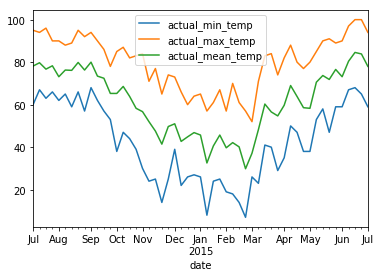

In [16]:
weekdata_condensed[['actual_min_temp',"actual_max_temp","actual_mean_temp"]].plot(kind="line")

In [17]:
data['actual_mean_temp'].head()

0    81
1    85
2    82
3    75
4    72
Name: actual_mean_temp, dtype: int64

In [18]:
#correlation between precipitation and actual mean temp
#linear relaionship?
from statsmodels.formula.api import ols
data = pd.DataFrame({'x': data['actual_mean_temp'],'y': data['actual_precipitation']})
model = ols("y ~ x", data).fit()
model.summary()
print(data.head())

    x     y
0  81  0.00
1  85  0.00
2  82  0.14
3  75  0.00
4  72  0.00


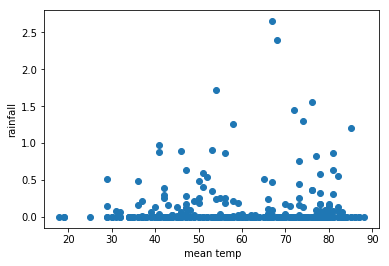

In [19]:
data=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv')
plt.scatter(data['actual_mean_temp'], data['actual_precipitation'])
plt.xlabel(' mean temp')
plt.ylabel('rainfall')
plt.show()